## Pip installing libraries


In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/manav/opt/anaconda3/lib/python3.8/site-packages (1.0.1)
Note: you may need to restart the kernel to use updated packages.


## Importing required libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


## Exploratory Data Analysis

In [7]:
df = pd.read_csv("Crop_recommendation.csv")

In [8]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
df.isna().value_counts()

N      P      K      temperature  humidity  ph     rainfall  label
False  False  False  False        False     False  False     False    2200
dtype: int64

## Plotting Graphs for all parameters

array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

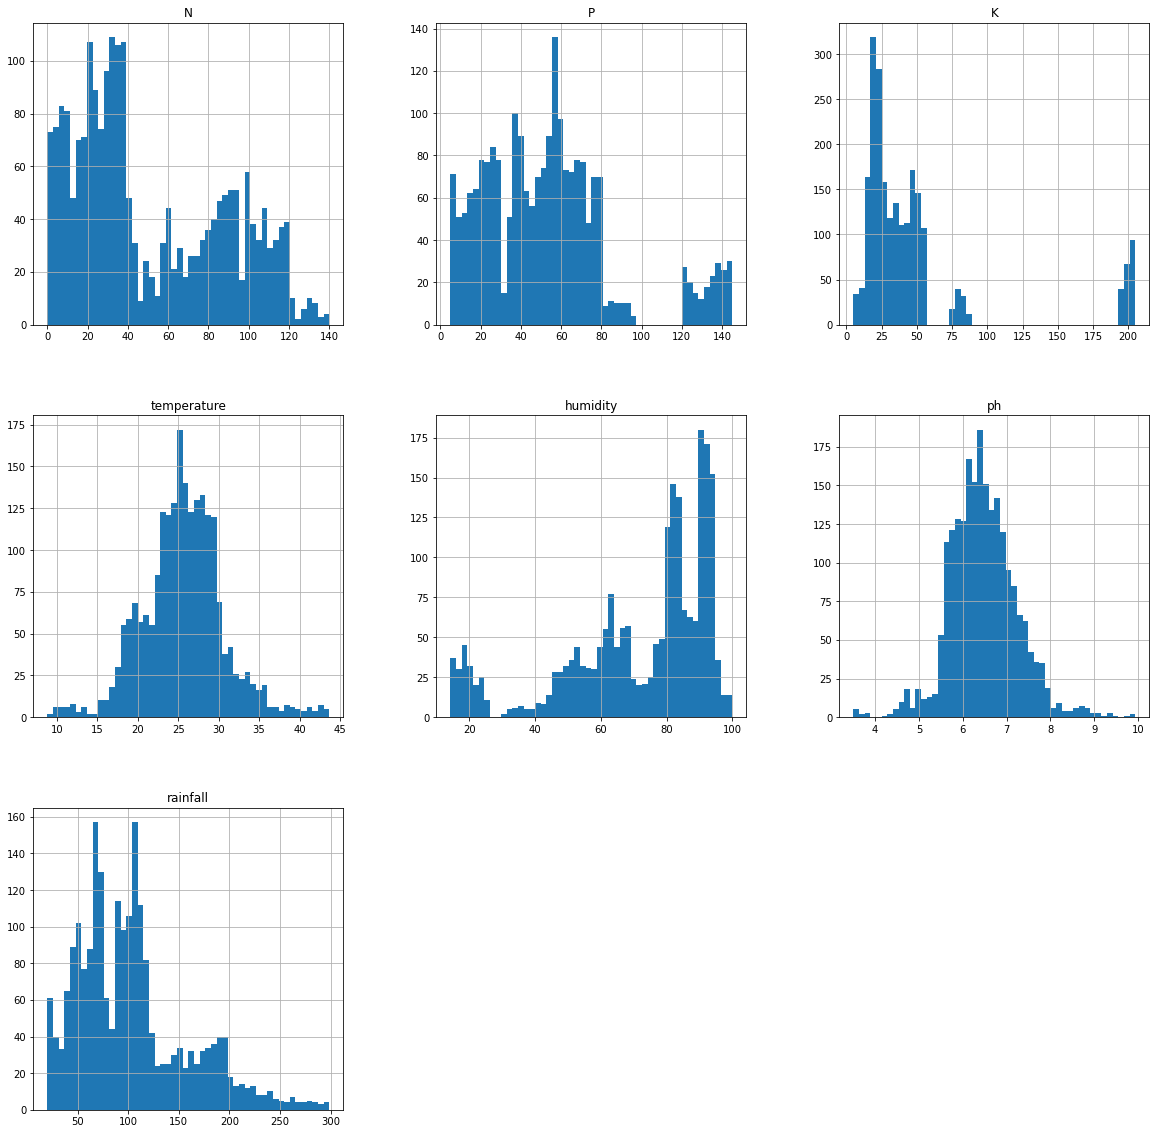

In [11]:
df[df.columns].hist(bins=50, figsize=(20,20))

## Finding skewness from the data visualized by the graph

In [12]:
print(df.skew())

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64


In [13]:
skew_cols = df.skew()
skew_cols = skew_cols[abs(skew_cols) > 1]
print(skew_cols)

P           1.010773
K           2.375167
humidity   -1.091708
dtype: float64


## Scaling the data

In [14]:
def min_max_scale(column, temp):
    temp[column]=temp[column]/(max(temp[column]) - min(temp[column]))

In [15]:
for col in skew_cols.index:
    if col != 'K':
        min_max_scale(col, df)

In [16]:
#normalization using log1
df[skew_cols.index] = np.log1p(df[skew_cols.index])

In [17]:
print(df[skew_cols.index].skew())

P           0.577057
K           0.867594
humidity   -1.362939
dtype: float64


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

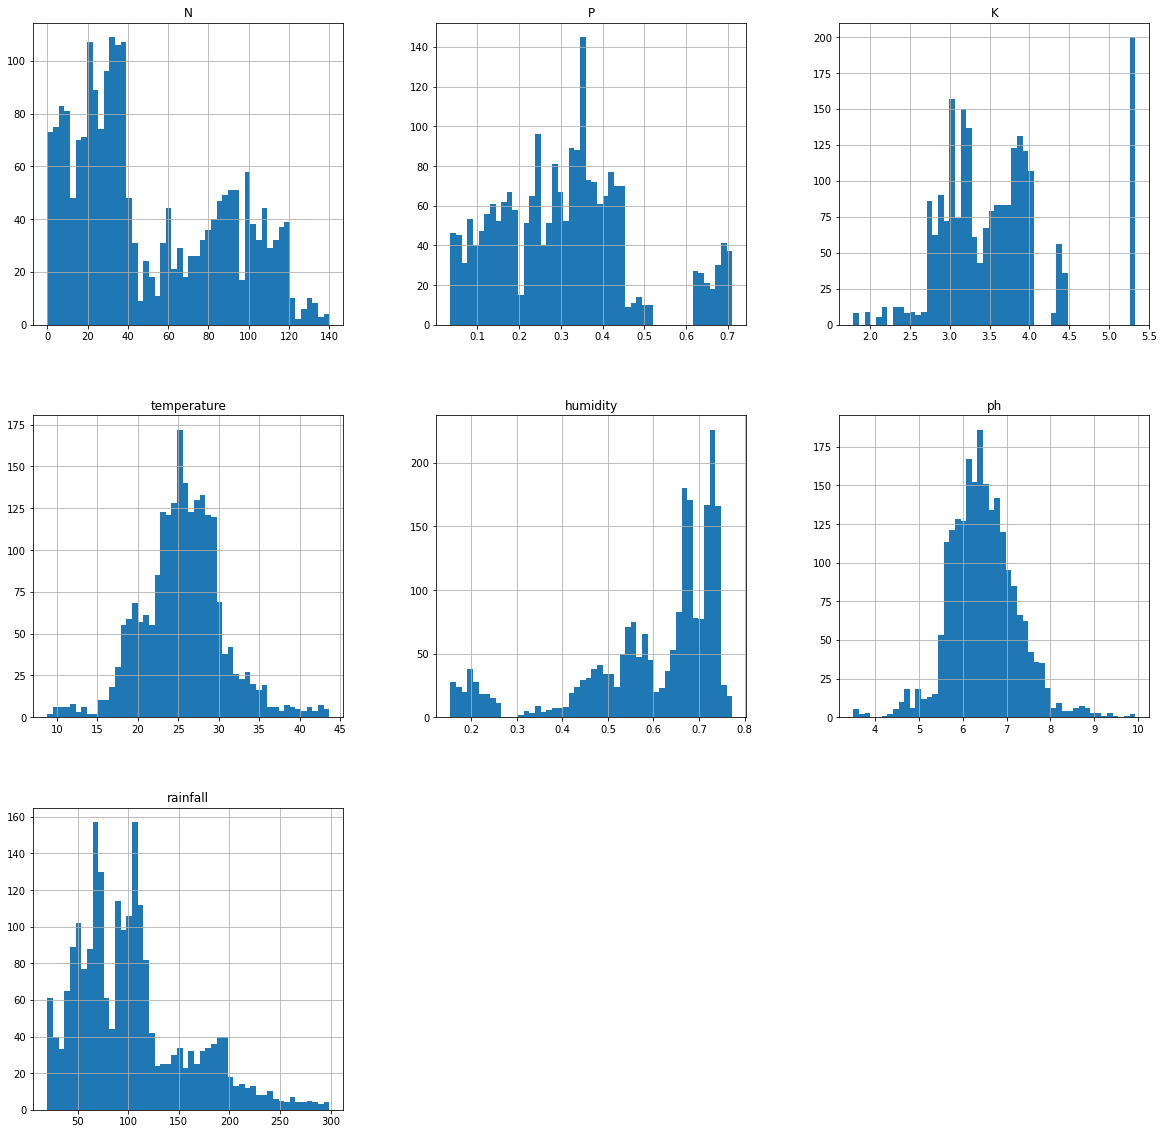

In [18]:
df[df.columns].hist(bins=50, figsize=(20,20))

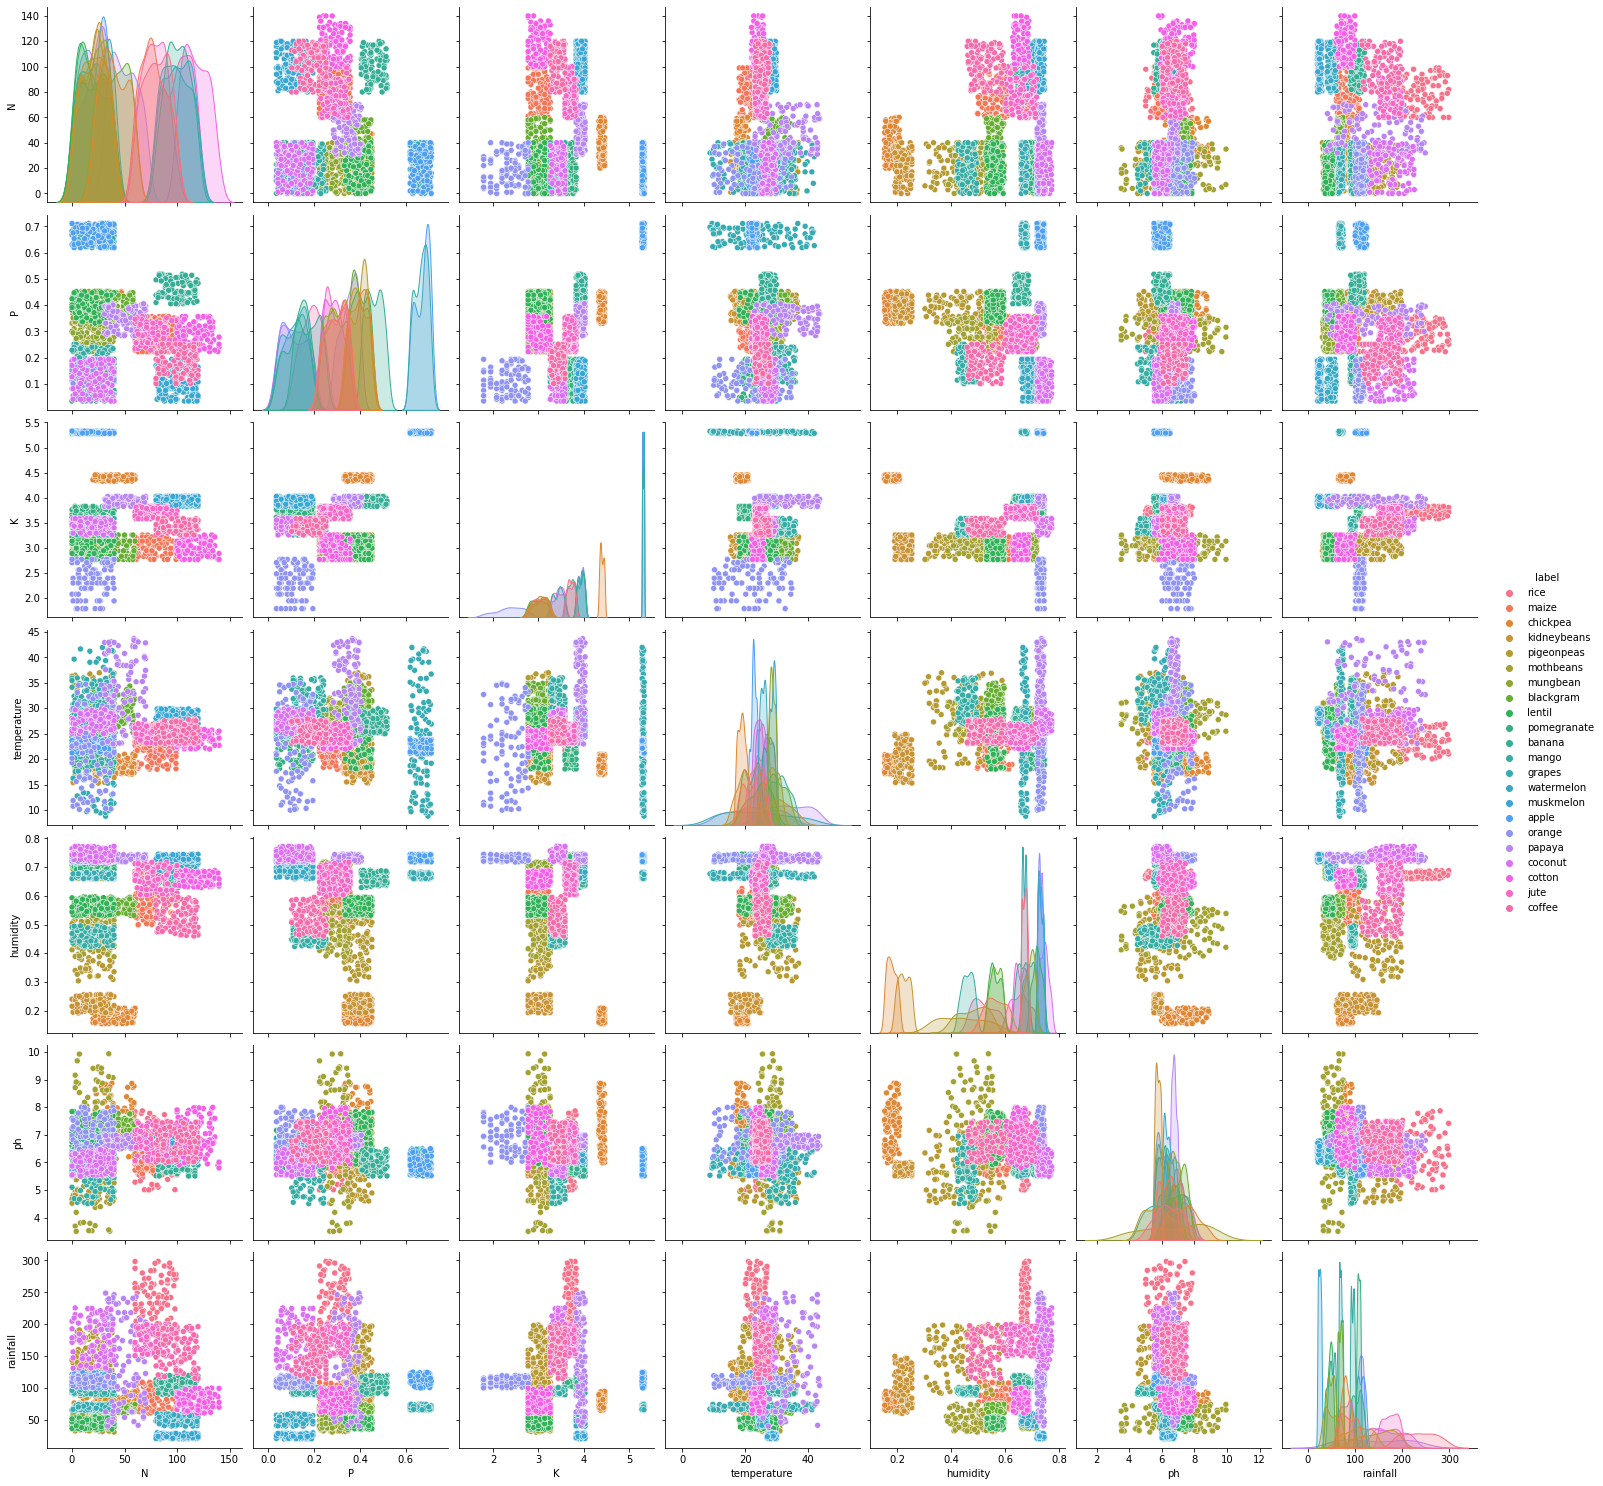

In [19]:
sn.pairplot(df,hue='label',height=3)

## KNN Classification Method - Training and Testing

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [21]:
train_cols = df.drop('label', axis=1).columns
x_train, x_test, y_train, y_test = train_test_split(df[train_cols], df['label'], test_size=0.3, random_state=23)

In [22]:
pd.DataFrame(x_train).head()
print(x_train)

        N         P         K  temperature  humidity        ph    rainfall
1731   34  0.395896  3.951244    27.347349  0.741278  6.687088   40.351531
921    40  0.176351  3.828641    21.660250  0.744699  5.885638  112.434969
944    37  0.075637  3.610918    24.247796  0.692193  6.710143  106.921603
1308   82  0.145954  3.828641    26.223380  0.690957  6.512196   54.601593
730    20  0.414944  2.995732    32.476483  0.559986  7.397191   65.820457
...   ...       ...       ...          ...       ...       ...         ...
1512   13  0.641854  5.323010    23.109427  0.733571  6.383180  108.183792
1993  101  0.234507  2.944439    22.923610  0.675278  7.637378   92.919151
1064   92  0.474458  3.951244    29.221186  0.665699  5.740765  108.861647
742    28  0.395896  2.995732    34.638810  0.540048  7.699507   72.431691
595     4  0.351662  3.135494    29.337434  0.452120  8.914075   42.440543

[1540 rows x 7 columns]


In [23]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [24]:
prediction = knn.predict(x_test)

In [25]:
x = metrics.accuracy_score(y_test, prediction)
print("Accuracy : ", x)

Accuracy :  0.7106060606060606


In [26]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       apple       0.67      0.68      0.68        38
      banana       0.76      0.81      0.79        27
   blackgram       0.75      0.89      0.81        37
    chickpea       0.61      0.96      0.75        28
     coconut       0.55      0.74      0.63        31
      coffee       0.80      0.71      0.75        28
      cotton       0.89      0.83      0.86        30
      grapes       0.74      0.80      0.77        25
        jute       0.54      0.88      0.67        24
 kidneybeans       0.46      0.32      0.38        34
      lentil       0.69      0.64      0.67        28
       maize       0.84      0.74      0.79        35
       mango       0.81      1.00      0.90        39
   mothbeans       0.50      0.28      0.36        25
    mungbean       0.49      0.71      0.58        24
   muskmelon       1.00      1.00      1.00        28
      orange       0.74      0.63      0.68        27
      papaya       1.00    

In [27]:
predicted_df = pd.DataFrame(prediction)

In [28]:
predicted_df.value_counts()

mango          48
blackgram      44
chickpea       44
coconut        42
apple          39
jute           39
pomegranate    37
mungbean       35
maize          31
banana         29
muskmelon      28
cotton         28
grapes         27
lentil         26
coffee         25
watermelon     25
kidneybeans    24
orange         23
rice           22
pigeonpeas     16
mothbeans      14
papaya         14
dtype: int64

## Predicting Crops that can be grown in India optimally
We checked the usual conditions of the given parameters in India and then compared it to our predictions, to find out growing which crops would give us the highest yield.

In [29]:
knn = KNeighborsClassifier()
knn.fit(df[train_cols], df['label'])
ideal_values = {'N': np.geomspace(6.7, 7.3, 300), 'P': np.geomspace(2.4, 3, 300), 'K': np.geomspace(0.7, 1.3, 300), 'temperature': np.geomspace(25, 35, 300),
'humidity': np.geomspace(78, 82, 300), 'ph' : np.geomspace(4.5, 8.5, 300), 'rainfall': np.geomspace(79, 86, 300)}

In [30]:
ideal_x = pd.DataFrame(ideal_values)

In [31]:
ideal_x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,6.700000,2.400000,0.700000,25.000000,78.000000,4.500000,79.000000
1,6.701922,2.401792,0.701451,25.028149,78.013047,4.509582,79.022435
2,6.703845,2.403585,0.702905,25.056330,78.026097,4.519184,79.044876
3,6.705768,2.405379,0.704361,25.084542,78.039148,4.528807,79.067324
4,6.707692,2.407175,0.705821,25.112786,78.052202,4.538450,79.089777


In [32]:
for col in skew_cols.index:
    if col != 'K':
        min_max_scale(col, ideal_x)

ideal_x[skew_cols.index] = np.log1p(ideal_x[skew_cols.index])
final = knn.predict(ideal_x)

In [33]:
pd.DataFrame(final).value_counts()

mango          175
kidneybeans    101
grapes          24
dtype: int64

## Conclusion :

From the above predictions, we find out that mango and kidneybeans are ideal to grow in Inda.
Thus the appropriate crops to grow would be Mango and Kidneybeans.